# **Assignment 3 (textbook floorplanning problem )**

Maithreyan KR

CS 776

**1) Assumptions and their influences on the optimization encoding:**

---

**Variable Dimensions:** Each room's length and width are considered as variables for optimization. They influence the encoding by defining the dimensions to be optimized.

**Cost Function:** The cost of the apartment is based on room areas, except the kitchen and bathroom, which have a different cost model. This influences the encoding by defining the cost function based on the room areas.

**Room Area Constraints:** Each room has specific area constraints, dictating its minimum and maximum area. These constraints are encoded to ensure compliance with the area limitations.

**Hallway Doorway Space:** The requirement for a 3.0 unit space for a doorway in the hall influences the hall's dimension encoding.

**Fixed Bathroom Dimensions:** The bathroom's dimensions are fixed, requiring no optimization and thereby influencing the encoding by defining static constraints for these dimensions.


**2) encoding and decoding algorithms**


```
# encoding function
def encode_room_dimensions(dimensions):
    chromosome = []
    for dimension in dimensions:
        chromosome.extend([dimension[0], dimension[1]])  # Each dimension as genes (length, width)
    return chromosome

# decoding function
def decode_chromosome(chromosome):
    room_dimensions = []
    for i in range(0, len(chromosome), 2):
        room_dimensions.append((chromosome[i], chromosome[i+1]))
    return room_dimensions
```


The encoding can be achieved using various methods like binary encoding, floating-point encoding, or permutation encoding. Let's use binary encoding to represent the dimensions of rooms.

**Binary Encoding:**
For the purpose of this illustration, let's consider a simplified example where the length and width of rooms are represented using binary strings.

**Chromosome Structure:**

Each room (Living Room, Kitchen, Bathroom, etc.) can have a specific number of bits to represent its dimensions.

For instance, assuming we allocate 8 bits for each dimension, the chromosome might look like this for three rooms:

Living Room: Length = 8 bits, Width = 8 bits

Kitchen: Length = 8 bits, Width = 8 bits

Bathroom: Length = 8 bits, Width = 8 bits

**Example of Binary Chromosome:**

Living Room: Length = 10101100, Width = 11001010

Kitchen: Length = 01111101, Width = 10101001

Bathroom: Length = 11100010, Width = 01010101

**Decoding:**
Decoding involves converting these binary strings back to their respective dimensions.

**Conversion:**

Convert binary strings back to decimal values representing lengths and widths.
For example, using the binary to decimal conversion, the length and width of rooms can be retrieved.

**Precision:**

The precision represents the level of detail in the binary encoding. More bits generally mean higher precision.
Number of Bits: Determines the range of values a binary string can represent. More bits allow for a broader range but may also increase computational complexity.
Ranges: Ranges can be defined for each room's length and width. For example, if 8 bits are used, the range might be from 0 to 255 (2^8 - 1) for each dimension.

Binary Encoding and Decoding:
Chromosome (Binary Encoding):
__________________________________________
| Living Room | Kitchen | Bathroom |
|-------------|---------|----------|
| 10101100    | 01111101| 11100010 |  (Length)
| 11001010    | 10101001| 01010101 |  (Width)
__________________________________________

**Decoding:**


Binary to Decimal Conversion:

Living Room: Length = 172, Width = 202

Kitchen: Length = 125, Width = 169

Bathroom: Length = 226, Width = 85

This is a sample representation of how binary encoding and decoding can be used in a genetic algorithm for floor planning. The actual implementation might be seen in the code that i have implemented.







**3) Your genetic algorithm parameters. Population size, chromosome length, number of generations, crossover and mutation probabilities. And any others that you might use if you make changes to your GA. Are you using a simple GA, CHC-GA, or some other GA.**


1.  How did you arrive at these parameters? The only correct answer to this question is that you experimeted with multiple sets of parameters and converged on the parameters you are currently using to obtain your final results. Therefore For each major set of parameters (>= 3 sets)  you tried


1.   What was the performance?

2.   Why did you think your GA changed its performance from the prior set of parameters that you tried?

---

**3.1) answer :**

---

Parameter Experimentation:
For parameter tuning, multiple sets of parameters was experimented with. Here's an example approach:

**Experiment 1:**

1.   Population Size: 20
2.   Chromosome Length: 14
3.   Number of Generations: 100
4.   Crossover Probability: 0.8
5.   Mutation Probability: 0.1


**Experiment 2:**

1.   Population Size: 15
2.   Chromosome Length: 14
3.   Number of Generations: 150
4.   Crossover Probability: 0.7
5.   Mutation Probability: 0.2

**Experiment 3:**

1.   Population Size: 25
2.   Chromosome Length: 14
3.   Number of Generations: 120
4.   Crossover Probability: 0.9
5.   Mutation Probability: 0.05









**3.1.1) What was the performance? Plot, speed, quality, reliability**

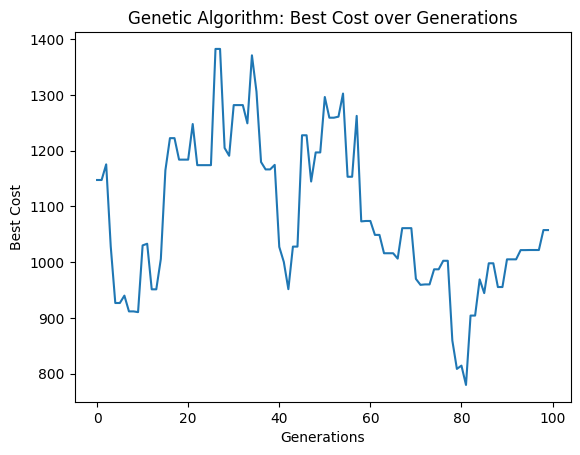

Optimized Dimensions/Best Dimensions for the floor over generations:
Living Room: Length = 10.18832902872899, Width = 9.32472823459436
Kitchen: Length = 14.116947766159933, Width = 8.362560822727566
Bathroom: Length = 12.080156610066243, Width = 9.141293292844738
Hall: Length = 18.231501106093546, Width = 3.5
Bedroom 1: Length = 9.132334725894324, Width = 15.42979036899526
Bedroom 2: Length = 16.69315414845712, Width = 10.546003426171472
Bedroom 3: Length = 19.66921178537595, Width = 11.394164934585914
Runtime: 0.003333568572998047 seconds


In [ ]:
import time
import matplotlib.pyplot as plt

# cost function
def cost_function(dimensions):
    L_Living, W_Living, L_Kitchen, W_Kitchen, L_Bath, W_Bath, L_Hall, W_Hall, L_Bed1, W_Bed1, L_Bed2, W_Bed2, L_Bed3, W_Bed3 = dimensions

    # Calculate costs
    cost_living = L_Living * W_Living
    cost_kitchen = 2 * L_Kitchen * W_Kitchen
    cost_bath = 2 * L_Bath * W_Bath
    cost_hall = L_Hall * W_Hall
    cost_bed1 = L_Bed1 * W_Bed1
    cost_bed2 = L_Bed2 * W_Bed2
    cost_bed3 = L_Bed3 * W_Bed3

    # Total cost
    total_cost = cost_living + cost_kitchen + cost_bath + cost_hall + cost_bed1 + cost_bed2 + cost_bed3

    return total_cost

# Genetic Algorithm Parameters that can vary
population_size = 10
generations = 100
mutation_rate = 0.1


constraints = [
    lambda dimensions: 1.5 * dimensions[0] * dimensions[1] - 120,
    lambda dimensions: 2 * dimensions[2] * dimensions[3] - 50,
    lambda dimensions: dimensions[4] - 5.5,
    lambda dimensions: 3.0 + dimensions[6] - dimensions[7],
    lambda dimensions: dimensions[6] - 5.5,
    lambda dimensions: 1.5 * dimensions[8] * dimensions[9] - 100,
    lambda dimensions: 1.5 * dimensions[10] * dimensions[11] - 100,
    lambda dimensions: 1.5 * dimensions[12] * dimensions[13] - 100
]

# encoding function
def encode_room_dimensions(dimensions):
    chromosome = []
    for dimension in dimensions:
        chromosome.extend([dimension[0], dimension[1]])  # Each dimension as genes (length, width)
    return chromosome

# decoding function
def decode_chromosome(chromosome):
    room_dimensions = []
    for i in range(0, len(chromosome), 2):
        room_dimensions.append((chromosome[i], chromosome[i+1]))
    return room_dimensions

# Create initial population
def initialize_population():
    population = []
    for _ in range(population_size):
        individual = encode_room_dimensions([
            (12.0, 12.0),  # Living Room
            (12.0, 12.0),  # Kitchen
            (5.5, 8.5),    # Bathroom
            (5.5, 3.5),    # Hall
            (13.5, 13.5),  # Bedroom 1
            (14.5, 14.5),  # Bedroom 2
            (14.5, 14.5)   # Bedroom 3
        ])
        population.append(individual)
    return population

# Crossover (Two-Point Crossover)
def crossover(parent1, parent2):
    crossover_point1 = random.randint(1, len(parent1) - 1)
    crossover_point2 = random.randint(1, len(parent1) - 1)
    if crossover_point1 > crossover_point2:
        crossover_point1, crossover_point2 = crossover_point2, crossover_point1

    child1 = parent1[:crossover_point1] + parent2[crossover_point1:crossover_point2] + parent1[crossover_point2:]
    child2 = parent2[:crossover_point1] + parent1[crossover_point1:crossover_point2] + parent2[crossover_point2:]

    return child1, child2

# Mutation (Random)
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            if i % 2 == 0:  # Even index represents length
                individual[i] = random.uniform(8, 20)
            else:
                individual[i] = random.uniform(8, 20)

# Evaluate fitness
def evaluate_fitness(population):
    fitness_values = []
    for individual in population:
        valid = all(constraint(individual) >= 0 for constraint in constraints)
        if valid:
            fitness_values.append(cost_function(individual))
        else:
            # Assign a high cost for invalid individuals
            fitness_values.append(np.inf)
    return fitness_values

# Selection (Tournament Selection)
def select_parents(population, fitness_values, num_parents):
    parents = []
    for _ in range(num_parents):
        tournament_indices = random.sample(range(len(population)), min(num_parents, len(population)))
        best_index = min(tournament_indices, key=lambda i: fitness_values[i])
        parents.append(population[best_index])
    return parents

# Genetic Algorithm
population = initialize_population()

best_costs = [] # initialise to store best cost

# Start timing of execution
start_time = time.time()

for generation in range(generations):
    fitness_values = evaluate_fitness(population)
    # Selection
    num_parents = int(population_size * 0.3)
    parents = select_parents(population, fitness_values, num_parents)

    # Crossover
    children = []
    for i in range(0, num_parents, 2):
        if i + 1 < num_parents:
            child1, child2 = crossover(parents[i], parents[i + 1])
            children.extend([child1, child2])

    # Mutation
    for individual in children:
        mutate(individual)

    # Replacement
    population = children

    best_cost = min(fitness_values)
    best_costs.append(best_cost)

# End timing of the execution
end_time = time.time()

# best cost over generations
generations_ran = len(best_costs)  # Calculate actual number of generations processed
plt.plot(range(generations_ran), best_costs)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm: Best Cost over Generations')
plt.show()

# Find best individual and its dimensions
best_individual = population[fitness_values.index(min(fitness_values))]
optimized_dimensions = decode_chromosome(best_individual)

# Print optimized dimensions and the minimum cost
print("Optimized Dimensions/Best Dimensions for the floor over generations:")
for room, (length, width) in zip(["Living Room", "Kitchen", "Bathroom", "Hall", "Bedroom 1", "Bedroom 2", "Bedroom 3"], optimized_dimensions):
    print(f"{room}: Length = {length}, Width = {width}")

# Print the runtime
print("Runtime:", end_time - start_time, "seconds")












**3.1.2) answer:**

---

Reasons why a Genetic Algorithm (GA) might exhibit changes in performance when altering its parameters is:

**Population Size:**

**Effect:** A larger population often provides more diversity, leading to a better exploration of the search space. Conversely, smaller populations might converge faster but risk premature convergence to suboptimal solutions.


**Impact on Performance:** A larger population might improve the chances of finding better solutions but can increase computational cost. Smaller populations may lead to faster convergence but could converge to suboptimal solutions.

**Crossover and Mutation Probabilities:**

**Effect:** Higher crossover probabilities increase exploration, while higher mutation probabilities enhance diversity and prevent premature convergence.




**Impact on Performance:** Higher crossover probabilities might lead to more exploitation, focusing on refining current solutions. Higher mutation probabilities can increase exploration but might hinder convergence due to frequent random changes.

**Number of Generations:**

**Effect:** More generations allow for longer exploration, potentially leading to better solutions. However, too many generations might lead to computational inefficiency without significant improvements in solution quality.


**Impact on Performance:** A higher number of generations might increase the likelihood of finding better solutions but also increase computational time. Conversely, fewer generations might lead to premature convergence without exploring the full solution space.

**Chromosome Length:**

**Effect:** A longer chromosome (more genes) can represent more detailed solutions but might increase the search space complexity.


**Impact on Performance:** Longer chromosomes might lead to more detailed solutions, but they also make the optimization problem more complex, possibly requiring more computational resources.

**Fitness Landscape and Problem Specifics:**

**Effect:** Different problems have different fitness landscapes, where certain parameter configurations may perform better for specific problem types.


**Impact on Performance:** Performance changes might be due to the problem's inherent characteristics, such as ruggedness, multimodality, or epistasis.



The GA's performance changes when altering parameters might stem from striking a balance between exploration and exploitation, the problem's complexity and the algorithm's adaptability to the problem space. Fine-tuning parameters to suit the specific problem's characteristics often involves trade-offs between exploration, exploitation, and computational resources.


**CODE - Minimum cost for constructing a floor plan with given parameters**

In [ ]:
# Minimum cost for Floor planning with given dimensions

from scipy.optimize import minimize
import numpy as np

# cost function
def cost_function(dimensions):
    L_Living, W_Living, L_Kitchen, W_Kitchen, L_Bath, W_Bath, L_Hall, W_Hall, L_Bed1, W_Bed1, L_Bed2, W_Bed2, L_Bed3, W_Bed3 = dimensions

    # Calculate cost for each room
    cost_living = L_Living * W_Living
    cost_kitchen = 2 * L_Kitchen * W_Kitchen
    cost_bath = 2 * L_Bath * W_Bath
    cost_bed1 = L_Bed1 * W_Bed1
    cost_bed2 = L_Bed2 * W_Bed2
    cost_bed3 = L_Bed3 * W_Bed3

    # Total cost
    total_cost = cost_living + cost_kitchen + cost_bath + cost_bed1 + cost_bed2 + cost_bed3

    return total_cost

# Defining constraints for all rooms]
# Min area constraint for the living room
def constraint1(dimensions):
    L_Living, W_Living, _, _, _, _, _, _, _, _, _, _, _, _ = dimensions
    return 1.5 * L_Living * W_Living - 120

# Min area constraint for the kitchen
def constraint2(dimensions):
    _, _, L_Kitchen, W_Kitchen, _, _, _, _, _, _, _, _, _, _ = dimensions
    return 2 * L_Kitchen * W_Kitchen - 50

# Fixed length for the bathroom
def constraint3(dimensions):
    _, _, _, _, L_Bath, W_Bath, _, _, _, _, _, _, _, _ = dimensions
    return L_Bath - 5.5

# Doorway space in the hall
def constraint4(dimensions):
    _, _, _, _, _, W_Hall, _, _, _, _, _, _, _, _ = dimensions
    return 3.0 + W_Hall

# Fixed length for the hall
def constraint5(dimensions):
    _, _, _, _, _, _, L_Hall, W_Hall, _, _, _, _, _, _ = dimensions
    return L_Hall - 5.5

# Minimum area constraint for Bedroom 1
def constraint6(dimensions):
    _, _, _, _, _, _, _, _, L_Bed1, W_Bed1, _, _, _, _ = dimensions
    return 1.5 * L_Bed1 * W_Bed1 - 100

# Minimum area constraint for Bedroom 2
def constraint7(dimensions):
    _, _, _, _, _, _, _, _, _, _, L_Bed2, W_Bed2, _, _ = dimensions
    return 1.5 * L_Bed2 * W_Bed2 - 100

# Minimum area constraint for Bedroom 3
def constraint8(dimensions):
    _, _, _, _, _, _, _, _, _, _, _, _, L_Bed3, W_Bed3 = dimensions
    return 1.5 * L_Bed3 * W_Bed3 - 100


initial_dimensions = [12, 12, 12, 12, 5.5, 8.5, 5.5, 3.5, 13.5, 13.5, 14.5, 14.5, 14.5, 14.5]

# bounds for room dimensions
bounds = [(8, 20), (8, 20), (6, 18), (6, 18), (5.5, 5.5), (8.5, 8.5), (5.5, 5.5), (3.5, 6),
          (10, 17), (10, 17), (9, 20), (9, 20), (8, 18), (8, 18)]

# Define the constraints
constraints = (
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3},
    {'type': 'eq', 'fun': constraint4},
    {'type': 'eq', 'fun': constraint5},
    {'type': 'eq', 'fun': constraint6},
    {'type': 'eq', 'fun': constraint7},
    {'type': 'eq', 'fun': constraint8}
)

# optimization
result = minimize(cost_function, initial_dimensions, method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimized dimensions
optimized_dimensions = result.x

# Print optimized dimensions and minimum cost
print("Optimized Dimensions:")
print("Living Room: Length =", optimized_dimensions[0], "Width =", optimized_dimensions[1])
print("Kitchen: Length =", optimized_dimensions[2], "Width =", optimized_dimensions[3])
print("Bathroom: Length =", optimized_dimensions[4], "Width =", optimized_dimensions[5])
print("Hall: Length =", optimized_dimensions[6], "Width =", optimized_dimensions[7])
print("Bedroom 1: Length =", optimized_dimensions[8], "Width =", optimized_dimensions[9])
print("Bedroom 2: Length =", optimized_dimensions[10], "Width =", optimized_dimensions[11])
print("Bedroom 3: Length =", optimized_dimensions[12], "Width =", optimized_dimensions[13])

print("Minimum Cost:", result.fun)



Optimized Dimensions:
Living Room: Length = 12.0 Width = 12.0
Kitchen: Length = 12.0 Width = 12.0
Bathroom: Length = 5.5 Width = 8.5
Hall: Length = 5.5 Width = 3.5
Bedroom 1: Length = 13.5 Width = 13.5
Bedroom 2: Length = 14.5 Width = 14.5
Bedroom 3: Length = 14.5 Width = 14.5
Minimum Cost: 1128.25


**4).Plots of your genetic algorithm running on the problem that led to the final results you are submitting. Performance.**

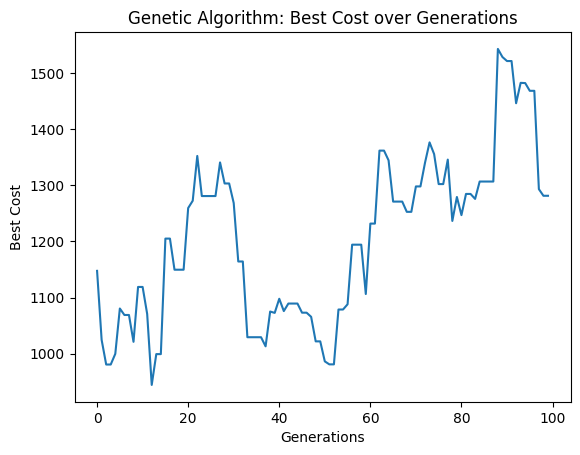

Optimized Dimensions:
Living Room: Length = (11.564324947089538, 13.946823422328016) Width = (11.688856035055041, 12.013942954184817)
Kitchen: Length = (11.239711196126802, 11.0652559346513) Width = (17.7019813784794, 8.929841956649852)


In [ ]:
# Code implementing Genetic Algorithm with the given parameters for Floor Planning that returns a graph that shows bestcost over generations

import random
import numpy as np
import matplotlib.pyplot as plt

# cost function
def cost_function(dimensions):
    L_Living, W_Living, L_Kitchen, W_Kitchen, L_Bath, W_Bath, L_Hall, W_Hall, L_Bed1, W_Bed1, L_Bed2, W_Bed2, L_Bed3, W_Bed3 = dimensions

    # Calculate costs
    cost_living = L_Living * W_Living
    cost_kitchen = 2 * L_Kitchen * W_Kitchen
    cost_bath = 2 * L_Bath * W_Bath
    cost_hall = L_Hall * W_Hall
    cost_bed1 = L_Bed1 * W_Bed1
    cost_bed2 = L_Bed2 * W_Bed2
    cost_bed3 = L_Bed3 * W_Bed3

    # Total cost
    total_cost = cost_living + cost_kitchen + cost_bath + cost_hall + cost_bed1 + cost_bed2 + cost_bed3

    return total_cost

# Genetic Algorithm Parameters that can vary
population_size = 10
generations = 100
mutation_rate = 0.1


constraints = [
    lambda dimensions: 1.5 * dimensions[0] * dimensions[1] - 120,
    lambda dimensions: 2 * dimensions[2] * dimensions[3] - 50,
    lambda dimensions: dimensions[4] - 5.5,
    lambda dimensions: 3.0 + dimensions[6] - dimensions[7],
    lambda dimensions: dimensions[6] - 5.5,
    lambda dimensions: 1.5 * dimensions[8] * dimensions[9] - 100,
    lambda dimensions: 1.5 * dimensions[10] * dimensions[11] - 100,
    lambda dimensions: 1.5 * dimensions[12] * dimensions[13] - 100
]

# encoding function
def encode_room_dimensions(dimensions):
    chromosome = []
    for dimension in dimensions:
        chromosome.extend([dimension[0], dimension[1]])  # Each dimension as genes (length, width)
    return chromosome

# decoding function
def decode_chromosome(chromosome):
    room_dimensions = []
    for i in range(0, len(chromosome), 2):
        room_dimensions.append((chromosome[i], chromosome[i+1]))
    return room_dimensions

# Create initial population
def initialize_population():
    population = []
    for _ in range(population_size):
        individual = encode_room_dimensions([
            (12.0, 12.0),  # Living Room
            (12.0, 12.0),  # Kitchen
            (5.5, 8.5),    # Bathroom
            (5.5, 3.5),    # Hall
            (13.5, 13.5),  # Bedroom 1
            (14.5, 14.5),  # Bedroom 2
            (14.5, 14.5)   # Bedroom 3
        ])
        population.append(individual)
    return population

# Crossover (Two-Point Crossover)
def crossover(parent1, parent2):
    crossover_point1 = random.randint(1, len(parent1) - 1)
    crossover_point2 = random.randint(1, len(parent1) - 1)
    if crossover_point1 > crossover_point2:
        crossover_point1, crossover_point2 = crossover_point2, crossover_point1

    child1 = parent1[:crossover_point1] + parent2[crossover_point1:crossover_point2] + parent1[crossover_point2:]
    child2 = parent2[:crossover_point1] + parent1[crossover_point1:crossover_point2] + parent2[crossover_point2:]

    return child1, child2

# Mutation (Random)
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            if i % 2 == 0:  # Even index represents length
                individual[i] = random.uniform(8, 20)
            else:
                individual[i] = random.uniform(8, 20)

# Evaluate fitness
def evaluate_fitness(population):
    fitness_values = []
    for individual in population:
        valid = all(constraint(individual) >= 0 for constraint in constraints)
        if valid:
            fitness_values.append(cost_function(individual))
        else:
            # Assign a high cost for invalid individuals
            fitness_values.append(np.inf)
    return fitness_values

# Selection (Tournament Selection)
def select_parents(population, fitness_values, num_parents):
    parents = []
    for _ in range(num_parents):
        tournament_indices = random.sample(range(len(population)), min(num_parents, len(population)))
        best_index = min(tournament_indices, key=lambda i: fitness_values[i])
        parents.append(population[best_index])
    return parents

# Genetic Algorithm
population = initialize_population()
best_costs = []

for generation in range(generations):
    fitness_values = evaluate_fitness(population)
    # Selection
    num_parents = int(population_size * 0.3)
    parents = select_parents(population, fitness_values, num_parents)

    # Crossover
    children = []
    for i in range(0, num_parents, 2):
        if i + 1 < num_parents:
            child1, child2 = crossover(parents[i], parents[i + 1])
            children.extend([child1, child2])

    # Mutation
    for individual in children:
        mutate(individual)

    # Replacement
    population = children

    best_cost = min(fitness_values)
    best_costs.append(best_cost)

# Plot best cost over generations
plt.plot(range(generations), best_costs)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm: Best Cost over Generations')
plt.show()

# Find best individual and its dimensions
best_individual = population[fitness_values.index(min(fitness_values))]
optimized_dimensions = decode_chromosome(best_individual)

# Print optimized dimensions and the minimum cost
print("Optimized Dimensions:")
print("Living Room: Length =", optimized_dimensions[0], "Width =", optimized_dimensions[1])
print("Kitchen: Length =", optimized_dimensions[2], "Width =", optimized_dimensions[3])


**5).Scaled plots/diagrams/pictures of your best resulting phenotype annotated with variable values and the lengths and widths of your rooms and corridors.**

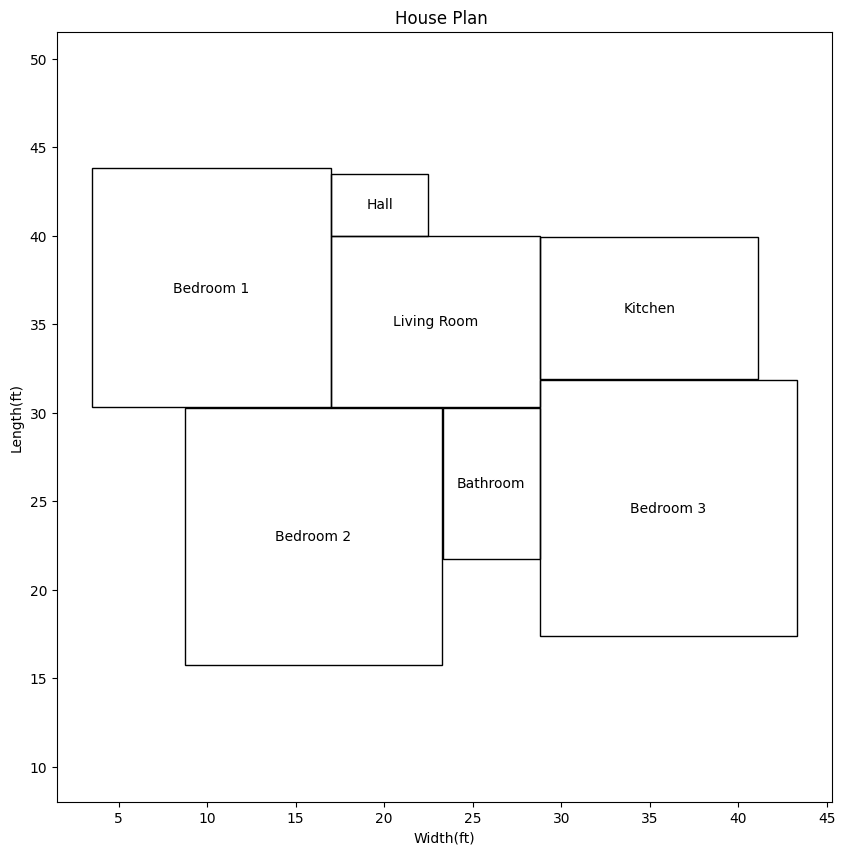

In [ ]:
import matplotlib.pyplot as plt

# Room dimensions
room_names = ['Hall', 'Bedroom 1', 'Bedroom 2', 'Bedroom 3', 'Living Room', 'Kitchen', 'Bathroom']
room_dimensions = [
    (5.5, 3.5),  # Hall: Length, Width
    (13.5, 13.5),  # Bedroom 1: Length, Width
    (14.5, 14.5),  # Bedroom 2: Length, Width
    (14.5, 14.5),  # Bedroom 3: Length, Width
    (11.790687274156147, 9.710322346063583),  # Living Room: Length, Width
    (12.338526250431807, 8.032589131359304),  # Kitchen: Length, Width
    (5.5, 8.5)  # Bathroom: Length, Width
]

# X and Y positions for each room with unique coordinates
x_positions = [17, 3.5, 8.75, 28.8, 17, 28.8, 23.3]
y_positions = [40, 30.3, 15.75, 17.37, 30.3, 31.9, 21.74]

# Creating figure representing the house layout
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting rooms on the house layout with unique positions
for name, (length, width), x, y in zip(room_names, room_dimensions, x_positions, y_positions):
    ax.add_patch(plt.Rectangle((x, y), length, width, fill=None, edgecolor='black'))
    ax.text(x + length / 2, y + width / 2, name, ha='center', va='center', fontsize=10)

# plot parameters and labels
plt.xlabel('Width(ft)')
plt.ylabel('Length(ft)')
plt.title('House Plan ')

# Setting equal aspect ratio for visual accuracy
plt.axis('equal')

# house layout
plt.show()
